<a href="https://colab.research.google.com/github/PhanTruong-Thinh/Data-Augmentation/blob/main/cnn_flower_image_classification_data_augmentations_CIFAR10_RandomTranslation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

<h3 style='color:purple'>Train test split</h3>

In [2]:
from sklearn.model_selection import train_test_split
from keras import Sequential, datasets, Model, layers
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


<h3 style='color:purple'>Preprocessing: scale images</h3>

In [3]:
X_train_scaled = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32') / 255
X_test_scaled = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32') / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [14]:

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 8s 4ms/step - loss: 2.9101 - accuracy: 0.3582
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5765 - accuracy: 0.4616
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4380 - accuracy: 0.4966
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3525 - accuracy: 0.5167
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 2.2867 - accuracy: 0.5350
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2399 - accuracy: 0.5460
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1994 - accuracy: 0.5562
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1651 - accuracy: 0.5642
Epoch 9/30
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1400 - accuracy: 0.5727
Epoch 10/30
1563/1563 [==============================] - 6s 4ms/step - loss: 2.110

In [15]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.4525 - accuracy: 0.5605


[2.4525279998779297, 0.5605000257492065]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [16]:
predictions = model.predict(X_test_scaled)
predictions

313/313 [==============================] - 1s 2ms/step


array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       , 13.261097 ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.5341036, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       , 16.850548 ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  5.053712 , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

0

In [ ]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [9]:
data_augmentation = keras.Sequential(
  [

    # layers.experimental.preprocessing.RandomRotation(0.2),
    # layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(factor=0.2),
    # layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),

  ]
)

**Original Image**

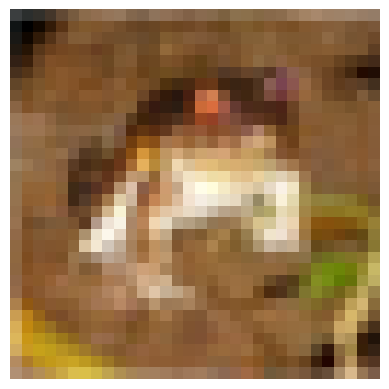

In [10]:
plt.axis('off')
plt.imshow(X_train[0])

**Newly generated training sample using data augmentation**

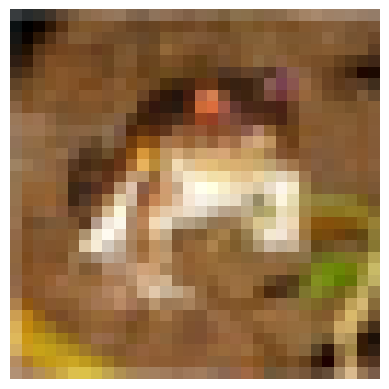

In [11]:
plt.axis('off')
plt.imshow(data_augmentation(X_train)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [12]:

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 9s 5ms/step - loss: 2.8403 - accuracy: 0.3568
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 2.5000 - accuracy: 0.4634
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3556 - accuracy: 0.5075
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2707 - accuracy: 0.5306
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2105 - accuracy: 0.5473
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1677 - accuracy: 0.5575
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1259 - accuracy: 0.5688
Epoch 8/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1065 - accuracy: 0.5731
Epoch 9/30
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0776 - accuracy: 0.5791
Epoch 10/30
1563/1563 [==============================] - 7s 5ms/step - loss: 2.059

In [13]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6947 - accuracy: 0.6488


[1.6947143077850342, 0.6488000154495239]